### **Problem Statement:** To identify what factors are important in graduate admission and how these factors are interrelated among themselevs and to predict one's chances of admission for a given set of variables.

Model Used: Linear Regression

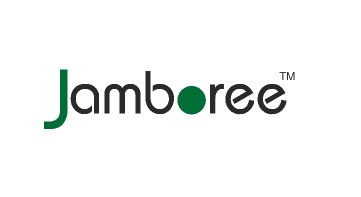

### Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

import os

In [55]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratory Data Analysis 

##### Descriptive Stats

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [57]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [58]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [59]:
#Basic Data Manipulation

#Dropping the Serial No column as there is no relavent information

df.drop(columns=['Serial No.'], axis = 1, inplace=True)

In [60]:
#Removing extra space from each column
df.columns = df.columns.str.strip()

In [61]:
## Univariate Analysis

In [62]:
def plot_histogram(df):
    """ To Plot the histogram of the continuous feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.distplot(df,bins=30,kde=False,color='red')


def plot_countplot(df):
    """ To plot bargraph to get the count of each score feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.countplot(df)


def plot_boxplot(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.boxplot(x,y)


def plot_scatter(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.scatterplot(x,y,color='green')


def plot_heatmap(df):
    """To plot the correaltion matrix to understand which feature is more related to target variable"""
    plt.figure(figsize=(10,6))
    plt.title(f'Correlation Matrix')
    sns.heatmap(df.corr(),annot=True)



count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64


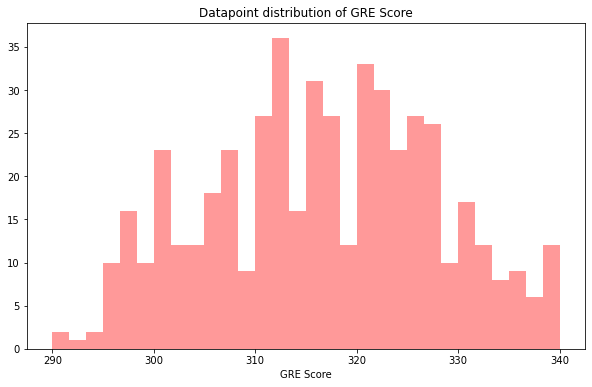

In [63]:
plot_histogram(df['GRE Score'])

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64


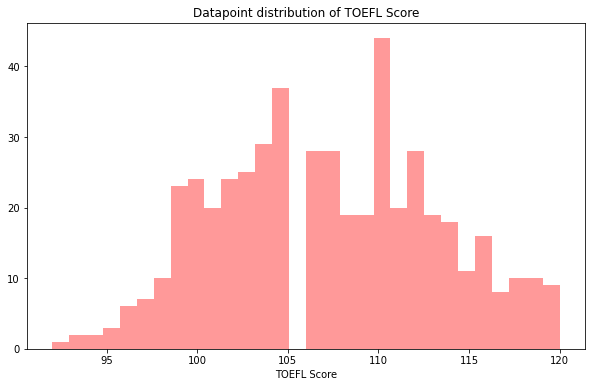

In [64]:
plot_histogram(df['TOEFL Score'])

count    500.000000
mean       3.114000
std        1.143512
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64


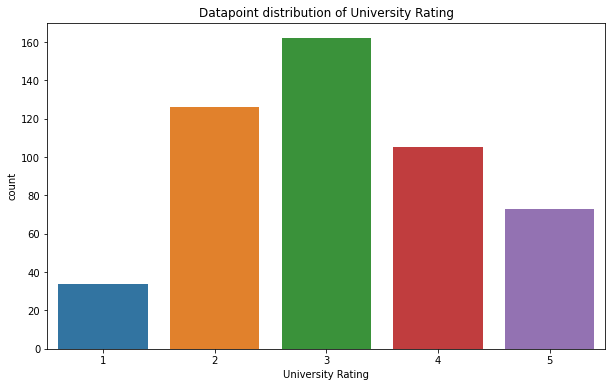

In [65]:
plot_countplot(df['University Rating'])

count    500.000000
mean       0.560000
std        0.496884
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64


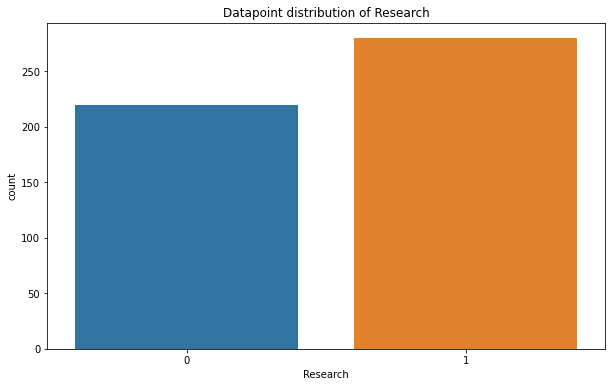

In [66]:
plot_countplot(df['Research'])

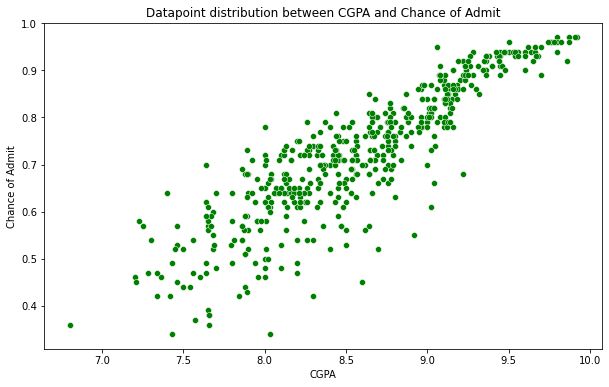

In [67]:
plot_scatter(x=df['CGPA'],y=df['Chance of Admit'])

##### It looks like with higher CGPA the chances of getting admitted is also high

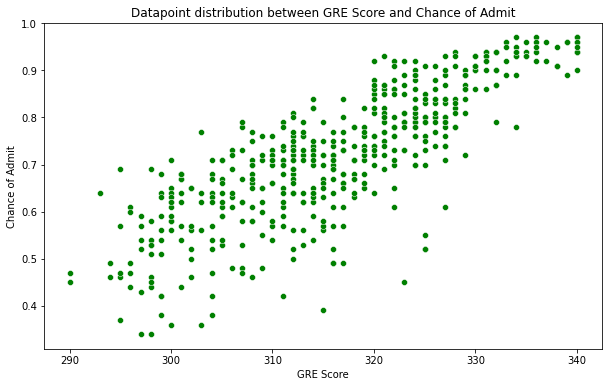

In [68]:
plot_scatter(x=df['GRE Score'],y=df['Chance of Admit'])

##### It looks like with higher GRE Score the chances of getting admitted is also high

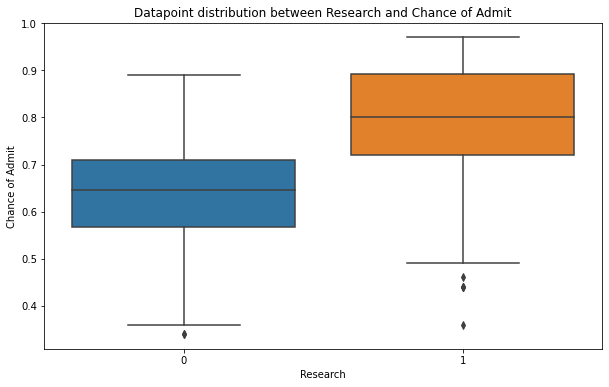

In [69]:
plot_boxplot(x=df['Research'], y=df['Chance of Admit'])

##### The mean value for chances of getting for reseach people is much higher as compared to non-research people

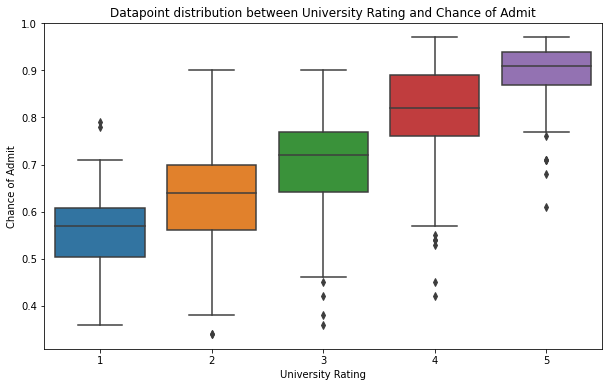

In [70]:
plot_boxplot(x=df['University Rating'], y=df['Chance of Admit'])

In [71]:
df[df['Research'] == 1]['University Rating'].value_counts()

3    87
4    82
5    64
2    37
1    10
Name: University Rating, dtype: int64

In [72]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

##### The Chances of getting admission increases with university rating

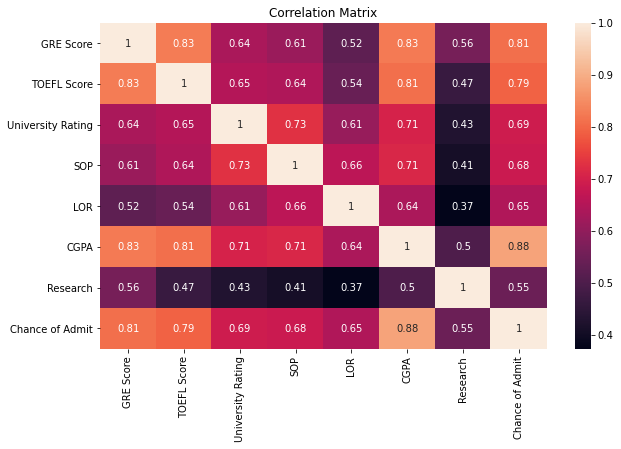

In [73]:
plot_heatmap(df)

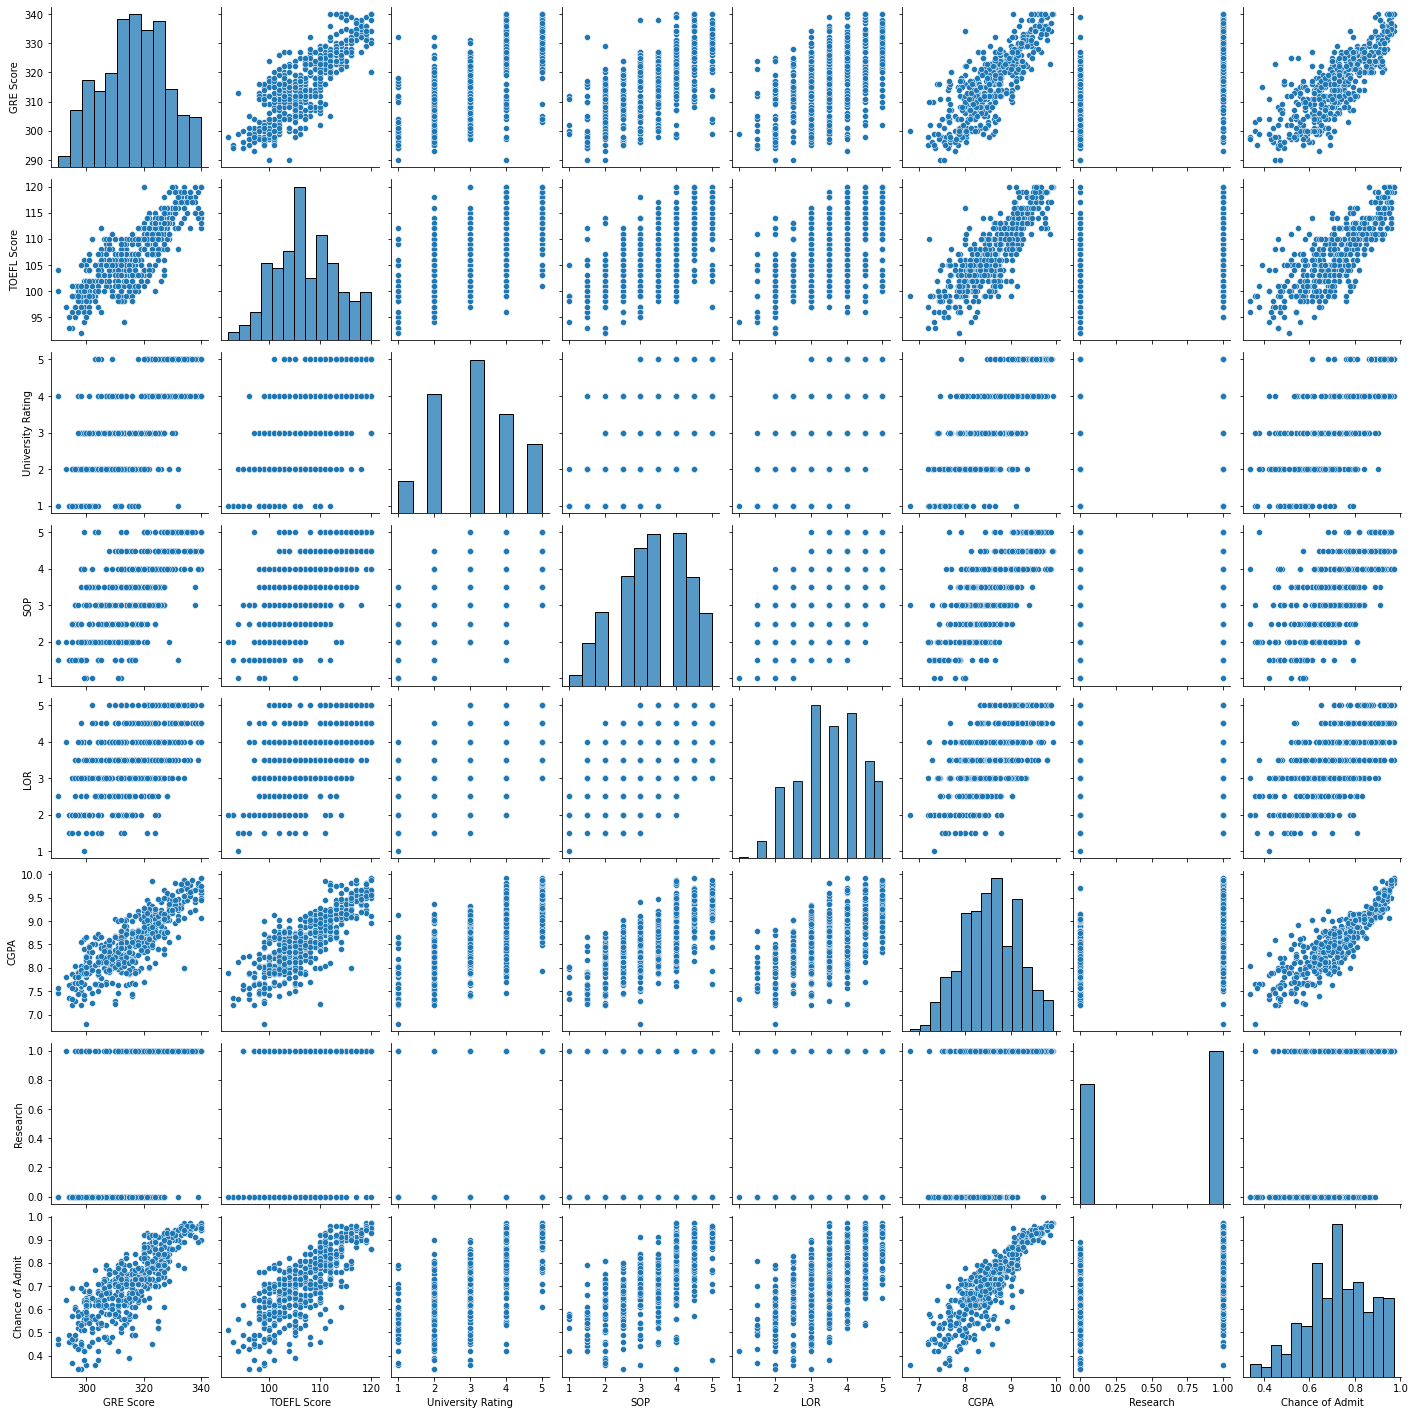

In [74]:
#pairplot
sns.pairplot(df)

In [75]:
num_cols = []

for items in df.columns:
    if (df[items].dtypes == 'int64') or (df[items].dtypes == 'float64'):
        num_cols.append(items)

#Removing the target column
num_cols = num_cols[:-1]

print(num_cols)

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']


In [76]:
skewness_array = []
for items in df[num_cols]:
    skewness_array.append([items,df[items].skew(),df[items].kurt()])


skew_df = pd.DataFrame(skewness_array,columns = ['Columns','Skewness','Kurtosis'])
skew_df

,Columns,Skewness,Kurtosis
0,GRE Score,-0.039842,-0.711064
1,TOEFL Score,0.095601,-0.653245
2,University Rating,0.090295,-0.810080
3,SOP,-0.228972,-0.705717
4,LOR,-0.145290,-0.745749
5,CGPA,-0.026613,-0.561278
6,Research,-0.242475,-1.949018


## Data Preprocessing

In [77]:
#Duplicate value check?

bool_series = df.duplicated(keep='first')
df[~bool_series]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [78]:
#Missing Values

df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [79]:
#Feature Enginnering

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Model Building

In [80]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Lets scale the data, standardization 
from sklearn.preprocessing import StandardScaler


X = df.drop('Chance of Admit', axis= 1)
y = df['Chance of Admit']


#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The dimension of X_train is (350, 7)
The dimension of X_test is (150, 7)


#### Linear and Ridge Regression Models

In [81]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction_lr = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

prediction_ridge = ridgeReg.predict(X_test)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for lr model is 0.8136087548060703
The test score for lr model is 0.8330100490780517

Ridge Model............................................

The train score for ridge model is 0.8129946034141572
The test score for ridge model is 0.836013818934287


In [82]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [83]:
w0 = lr.intercept_
w = lr.coef_

Coef_df = pd.DataFrame({'Columns': X.columns, 'Coef_': w})
print('Coefficient and Intercept for Linear Regression')
print(f'Intercept_: {w0}')
print(Coef_df)

Coefficient and Intercept for Linear Regression
Intercept_: 0.7210000000000001
             Columns     Coef_
0          GRE Score  0.016777
1        TOEFL Score  0.018049
2  University Rating  0.009880
3                SOP -0.005843
4                LOR  0.013553
5               CGPA  0.074673
6           Research  0.011419


In [84]:
w0 = ridgeReg.intercept_
w = ridgeReg.coef_

Coef_df = pd.DataFrame({'Columns': X.columns, 'Coef_': w})
print('Coefficient and Intercept for Ridge Regression')
print(f'Intercept_: {w0}')
print(Coef_df)

Coefficient and Intercept for Ridge Regression
Intercept_: 0.7210000000000001
             Columns     Coef_
0          GRE Score  0.019274
1        TOEFL Score  0.019591
2  University Rating  0.010089
3                SOP -0.003853
4                LOR  0.014047
5               CGPA  0.067541
6           Research  0.011556


### Lasso Regression

In [85]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.000266830598238732


In [86]:
# We need to check for diffent values of alpha. Hence using Lasso CV

In [87]:
#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)
prediction_lasso = lasso_cv.predict(X_test)

print("\nLasso Model............................................\n")
print("The train score for ls model is {}".format(lasso_cv.score(X_train, y_train)))
print("The test score for ls model is {}".format(lasso_cv.score(X_test, y_test)))


Lasso Model............................................

The train score for ls model is 0.8130055007346269
The test score for ls model is 0.8362380544938276


## Testing the assumptions of the linear regression model

#### Multicollinearity check by VIF score

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


VIF_df = pd.DataFrame()

VIF_df['features'] = X.columns

# calculating VIF for each feature
VIF_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [89]:
VIF_df

,features,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [90]:
# There is only one feature with VIF score less than 5. 
# Does it mean we drop all others?
# NO, we need to drop the features with one by one in decreasing order of VIF and train the model again to see the score.

####  Mean of residuals

In [91]:
residual = pd.DataFrame()
residual['Actual'] = actual
residual['Predicted'] = prediction_lr
residual['diff'] = residual['Actual'] - residual['Predicted']

In [92]:
mean_of_residual = round(residual['diff'].mean(),2)
print(f'Mean of residual: {mean_of_residual}')

Mean of residual: 0.0


#### Linearity of variables

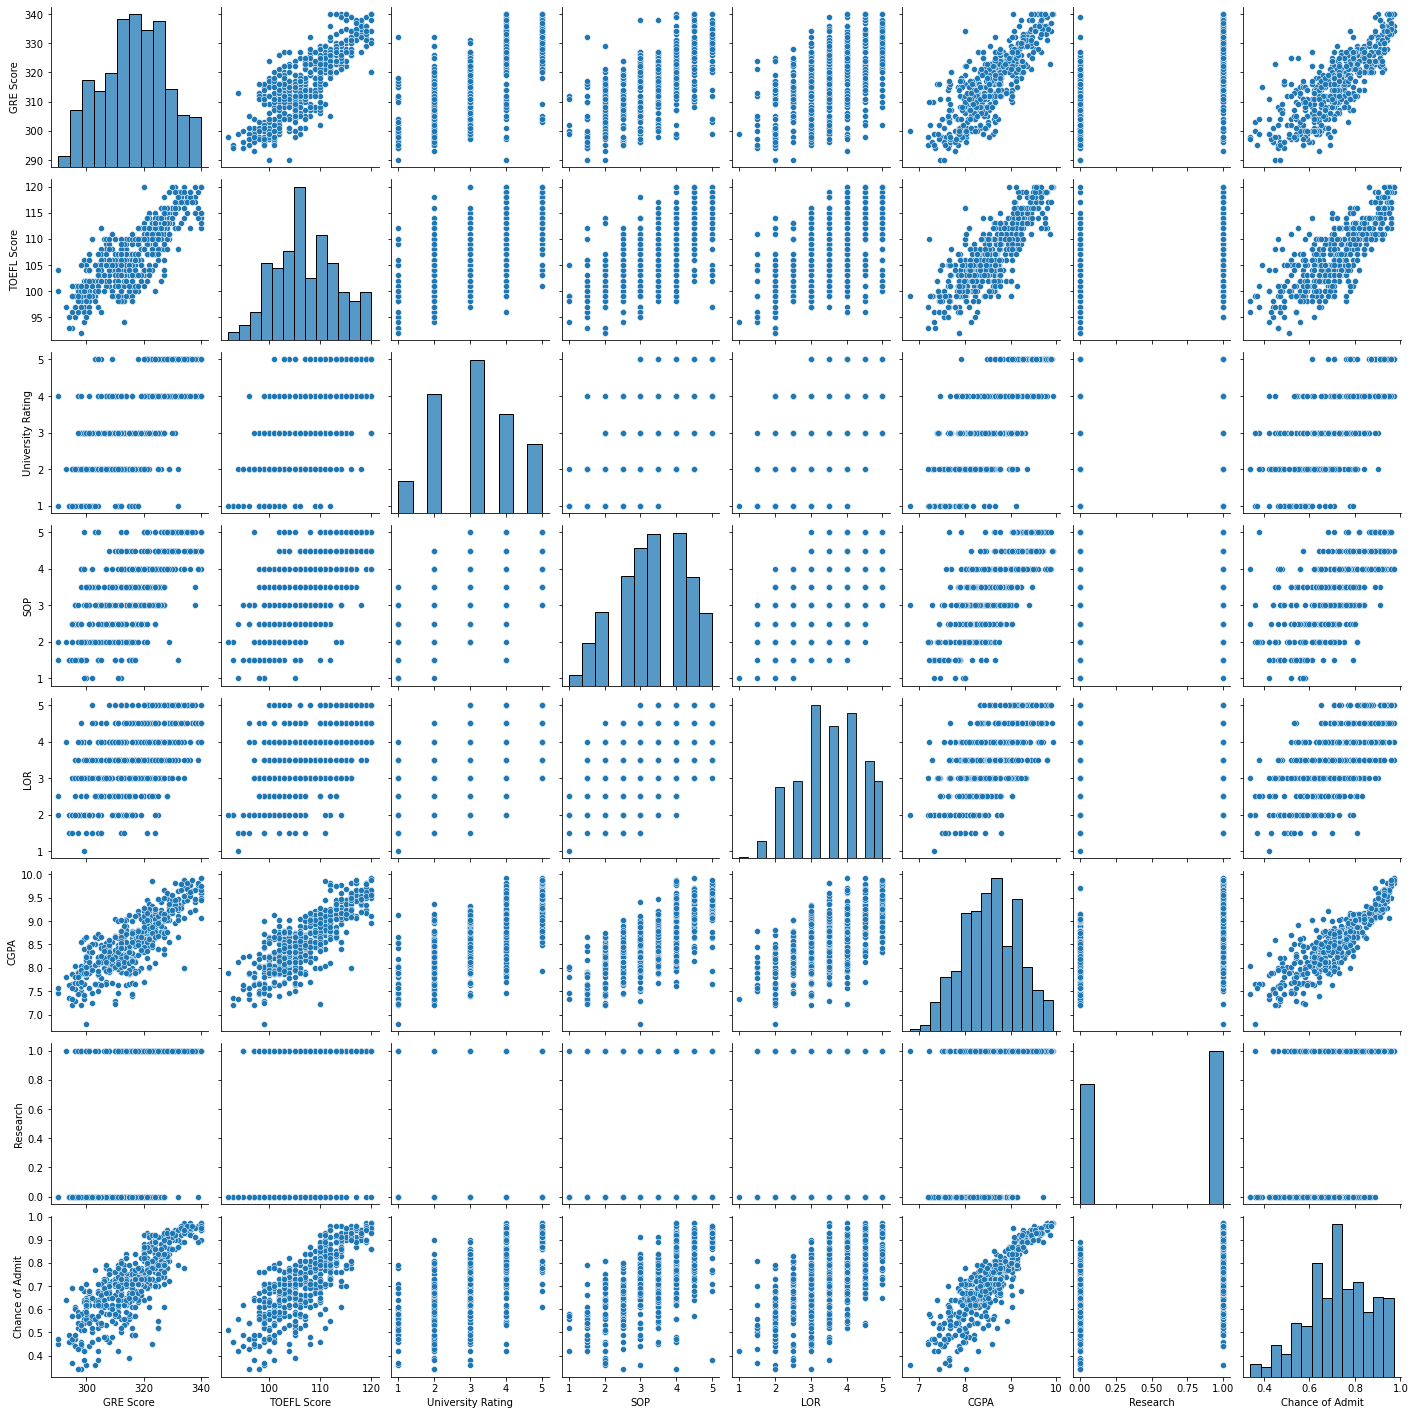

In [93]:
p = sns.pairplot(df)

In [94]:
# We can see GRE Score, TOFEL Score and CGPA has a linear relationship with the target variable (Chance of Admit)

#### Test for Homoscedasticity

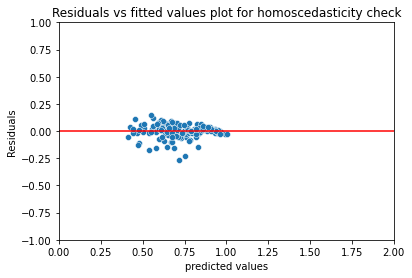

In [95]:
p = sns.scatterplot(prediction_lr,residual['diff'])
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,2)
p = sns.lineplot([0,2],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [96]:
# Most of the data points do pass through the Linear line, but its too early to conclude the nautre of homoscadasicity.

#### Normality of residuals

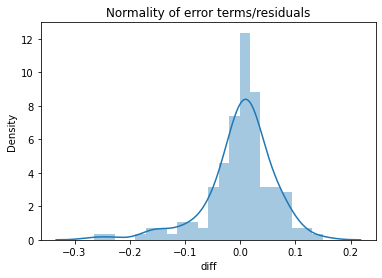

In [97]:
p = sns.distplot(residual['diff'],kde=True)
p = plt.title('Normality of error terms/residuals')

In [98]:
# The residuals terms looks pretty much normally distributed for the number of test points we took. 
# Based on CLT we can say with increase number of sample size the cure will look more bell shaped.

## Model Performance Evaluation

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

print("MAE for Linear Regression",mean_absolute_error(actual,prediction_lr))
print("MAE for Ridge Regression",mean_absolute_error(actual,prediction_ridge))
print("MAE for Lasso Regression",mean_absolute_error(actual,prediction_lasso))


MAE for Linear Regression 0.04311384143179336
MAE for Ridge Regression 0.04242004480355485
MAE for Lasso Regression 0.04282186440149131


In [100]:
print("MSE for Linear Regression",mean_squared_error(actual,prediction_lr))
print("MSE for Ridge Regression",mean_squared_error(actual,prediction_ridge))
print("MSE for Lasso Regression",mean_squared_error(actual,prediction_lasso))


MSE for Linear Regression 0.0038078132188459762
MSE for Ridge Regression 0.0037393193094712117
MSE for Lasso Regression 0.003734206144738604


In [101]:
print("RMSE for Linear Regression",np.sqrt(mean_squared_error(actual,prediction_lr)))
print("RMSE for Ridge Regression",np.sqrt(mean_squared_error(actual,prediction_ridge)))
print("RMSE for Lasso Regression",np.sqrt(mean_squared_error(actual,prediction_lasso)))

RMSE for Linear Regression 0.06170748106061352
RMSE for Ridge Regression 0.06114997391226926
RMSE for Lasso Regression 0.06110815121355419


In [102]:
print("R2 Score for Linear Regression",r2_score(actual,prediction_lr))
print("R2 Score for Ridge Regression",r2_score(actual,prediction_ridge))
print("R2 Score for Lasso Regression",r2_score(actual,prediction_lasso))

R2 Score for Linear Regression 0.8330100490780517
R2 Score for Ridge Regression 0.836013818934287
R2 Score for Lasso Regression 0.8362380544938276


In [103]:
n= X_test.shape[0]
k= X_test.shape[1]

print("Adjusted R2 Score for Linear Regression",(1 - ((1-r2_score(actual,prediction_lr))*(n-1)/(n-k-1))))
print("Adjusted R2 Score for Ridge Regression",(1 - ((1-r2_score(actual,prediction_ridge))*(n-1)/(n-k-1))))
print("Adjusted R2 Score for Lasso Regression",(1 - ((1-r2_score(actual,prediction_lasso))*(n-1)/(n-k-1))))


Adjusted R2 Score for Linear Regression 0.8247781500889415
Adjusted R2 Score for Ridge Regression 0.8279299931071039
Adjusted R2 Score for Lasso Regression 0.8281652825322557
